In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.94G/1.96G [00:12<00:00, 252MB/s]
100% 1.96G/1.96G [00:12<00:00, 164MB/s]


In [8]:
!unzip /content/100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [9]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
import cv2
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input, decode_predictions

In [10]:
data_dir = "/content/train/"
class_names=os.listdir(data_dir)
# class_names = ['collapsed_building', 'fire', 'flooded_areas', 'normal', 'traffic_incident']
print(class_names)

['FIERY MINIVET', 'GREAT GRAY OWL', 'VEERY', 'ROADRUNNER', 'BLACK AND YELLOW BROADBILL', 'EUROPEAN TURTLE DOVE', 'ORANGE BRESTED BUNTING', 'INDIAN BUSTARD', 'CRESTED WOOD PARTRIDGE', 'SPOTTED CATBIRD', 'ANIANIAU', 'BARN OWL', 'BLACKBURNIAM WARBLER', 'HARPY EAGLE', 'FLAME BOWERBIRD', 'BAIKAL TEAL', 'TREE SWALLOW', 'CAPPED HERON', 'DEMOISELLE CRANE', 'RED NAPED TROGON', 'SNOWY SHEATHBILL', 'TAILORBIRD', 'CURL CRESTED ARACURI', 'AZURE BREASTED PITTA', 'RED BEARDED BEE EATER', 'JAPANESE ROBIN', 'WOOD THRUSH', 'IBERIAN MAGPIE', 'STRIATED CARACARA', 'BANDED BROADBILL', 'ALPINE CHOUGH', 'EASTERN TOWEE', 'WHITE CRESTED HORNBILL', 'AMERICAN KESTREL', 'STRIPPED MANAKIN', 'NOISY FRIARBIRD', 'WHITE CHEEKED TURACO', 'DALMATIAN PELICAN', 'RED SHOULDERED HAWK', 'AZURE TANAGER', 'WRENTIT', 'PHILIPPINE EAGLE', 'PATAGONIAN SIERRA FINCH', 'ALTAMIRA YELLOWTHROAT', 'WHITE THROATED BEE EATER', 'INDIGO BUNTING', 'RUBY THROATED HUMMINGBIRD', 'GREY HEADED CHACHALACA', 'ANTILLEAN EUPHONIA', 'BARN SWALLOW', 'EUR

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

valid_generator = train_datagen.flow_from_directory(
    '/content/valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


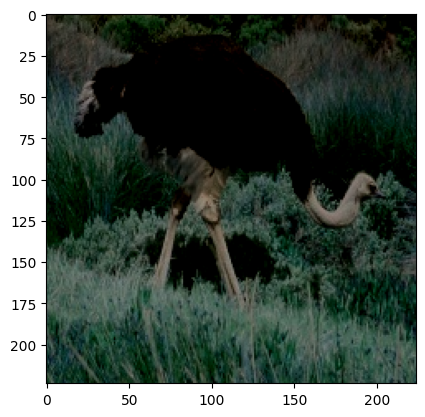

In [12]:
x,y=train_generator[0]
plt.imshow(np.asarray(x[0])/255)

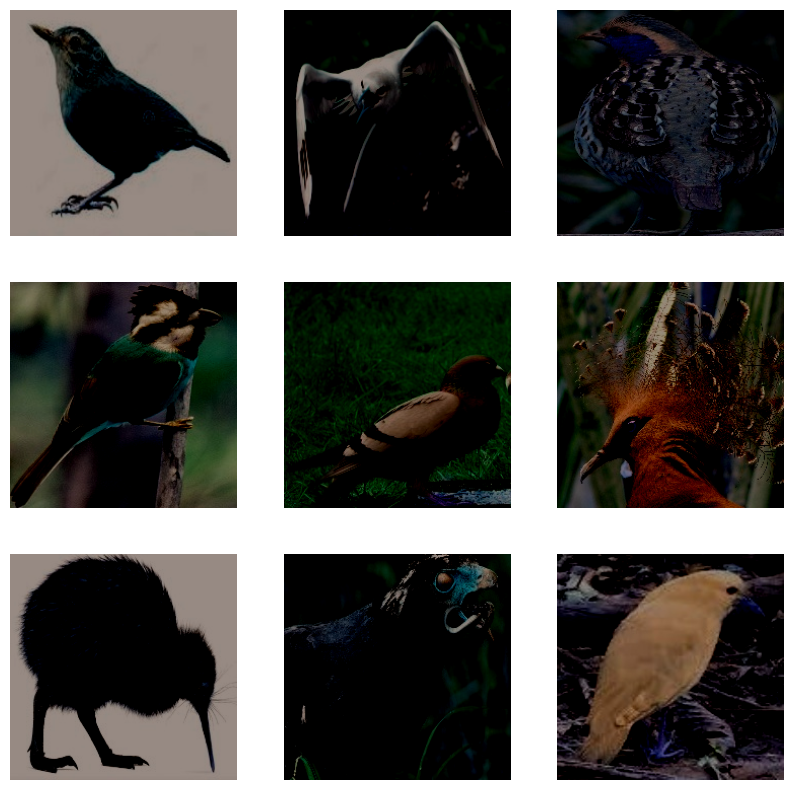

In [13]:
images, labels = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.asarray(images[i])/255)
    plt.axis('off')
plt.show()

### Loading VGG16 model as original

In [14]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

553467096/553467096 [==============================] - 5s 0us/step


In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

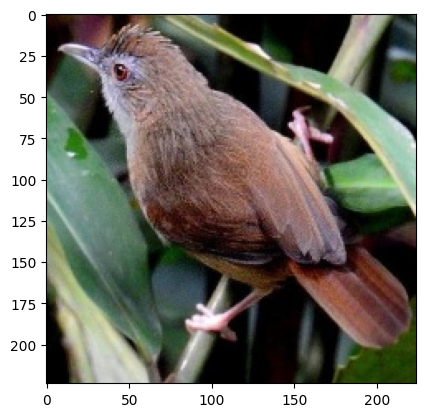

In [16]:
img = load_img('/content/test/ABBOTTS BABBLER/1.jpg', target_size=(224,224,3))
plt.imshow(img, 'gray')

### performing Prediction on pretrained weights

In [17]:
preds = base_model.predict(np.expand_dims(img, 0))

1/1 [==============================] - 3s 3s/step


In [18]:
resultDecoded = decode_predictions(preds)[0]
resultDecoded

35363/35363 [==============================] - 0s 0us/step


[('n01537544', 'indigo_bunting', 0.40391684),
 ('n01532829', 'house_finch', 0.32269648),
 ('n01534433', 'junco', 0.10726867),
 ('n01560419', 'bulbul', 0.08978083),
 ('n01580077', 'jay', 0.02348716)]

### Visualizing the pretrained Layers

In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load your VGG16 model
# Replace 'your_model_path' with the actual path to your VGG16 model file
# my_model = tf.keras.models.load_model('/content/vgg16_birds_classification.h5')
my_model = base_model

# Choose an image for visualization
# Replace 'your_image_path' with the actual path to your image file
img_path = '/content/test/ABBOTTS BABBLER/3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the names and indices of the layers you want to visualize
# layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_names=['block1_conv1',
 'block1_conv2',
 'block2_conv1',
 'block2_conv2',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3']
layer_indices = [my_model.get_layer(name).output for name in layer_names]

# Create a visualization model
visualization_model = tf.keras.models.Model(inputs=my_model.input, outputs=layer_indices)

# Forward pass the input image through the visualization model
feature_maps = visualization_model.predict(img_array)

# Save and visualize the feature maps
saving_path = 'featureMaps/vgg16/'
for layer_name, feature_map in zip(layer_names, feature_maps):
    num_filters = feature_map.shape[-1]
    fig, ax = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(min(64, num_filters)):
        ax[i // 8, i % 8].imshow(feature_map[0, :, :, i], cmap='gray')
        ax[i // 8, i % 8].axis('off')
        ax[i // 8, i % 8].set_title(f'Filter: {i + 1}')
    fig.suptitle(f'VGG16 Layer: {layer_name}', fontsize=20)
    # plt.savefig(saving_path + f'vgg16_{layer_name}_feature_map.png')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Now training the Dense Layer only for our problem

In [20]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)

predictions = tf.keras.layers.Dense(525, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_generator,
                    epochs=2,
                    validation_data=valid_generator)

Epoch 1/2
1323/1323 [==============================] - 376s 274ms/step - loss: 1.5299 - accuracy: 0.6589 - val_loss: 0.5936 - val_accuracy: 0.8396
Epoch 2/2
1323/1323 [==============================] - 355s 268ms/step - loss: 0.6153 - accuracy: 0.8336 - val_loss: 0.5750 - val_accuracy: 0.8491


In [23]:
test_loss, test_acc = model.evaluate(valid_generator)
print('Test Accuracy:', test_acc)

42/42 [==============================] - 11s 250ms/step - loss: 0.5750 - accuracy: 0.8491
Test Accuracy: 0.849142849445343


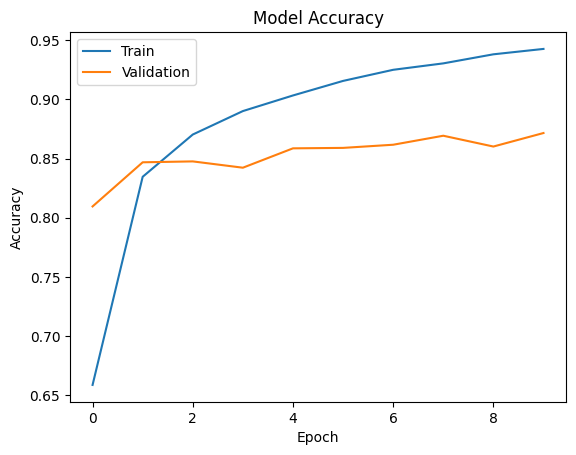

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

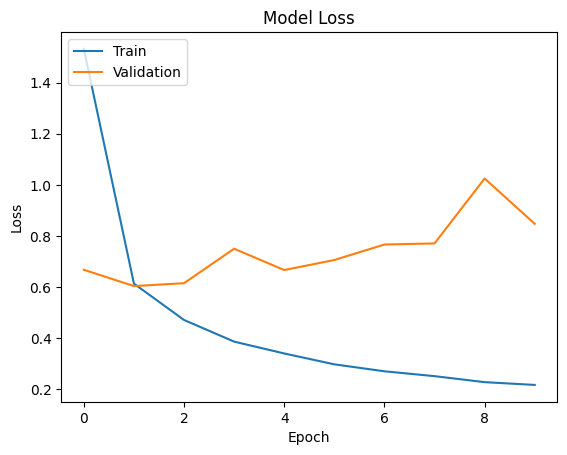

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
class_names[np.argmax(preds, 1)[0]]

'DOUBLE BARRED FINCH'

# Visualizing fine tuned VGG16 model.

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load your VGG16 model
# my_model = tf.keras.models.load_model('/content/vgg16_birds_classification.h5')
my_model = model

# Choose an image for visualization
img_path = '/content/test/ABBOTTS BABBLER/3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the names and indices of the layers you want to visualize
# layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_names=['block1_conv1',
 'block1_conv2',
 'block2_conv1',
 'block2_conv2',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3']
layer_indices = [my_model.get_layer(name).output for name in layer_names]

# Create a visualization model
visualization_model = tf.keras.models.Model(inputs=my_model.input, outputs=layer_indices)

# Forward pass the input image through the visualization model
feature_maps = visualization_model.predict(img_array)

# Save and visualize the feature maps
saving_path = 'featureMaps/vgg16/'
for layer_name, feature_map in zip(layer_names, feature_maps):
    num_filters = feature_map.shape[-1]
    fig, ax = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(min(64, num_filters)):
        ax[i // 8, i % 8].imshow(feature_map[0, :, :, i], cmap='gray')
        ax[i // 8, i % 8].axis('off')
        ax[i // 8, i % 8].set_title(f'Filter: {i + 1}')
    fig.suptitle(f'VGG16 Layer: {layer_name}', fontsize=20)
    # plt.savefig(saving_path + f'vgg16_{layer_name}_feature_map.png')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Training the last 2 Conv and dense

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-2]:
    layer.trainable = False
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)

predictions = tf.keras.layers.Dense(525, activation='softmax')(x)
modelCNNDense = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
modelCNNDense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelCNNDense.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator)

Epoch 1/10
1323/1323 [==============================] - 384s 279ms/step - loss: 2.3254 - accuracy: 0.5187 - val_loss: 0.7324 - val_accuracy: 0.8050
Epoch 2/10
1323/1323 [==============================] - 355s 268ms/step - loss: 0.8437 - accuracy: 0.7833 - val_loss: 0.6601 - val_accuracy: 0.8297
Epoch 3/10
1323/1323 [==============================] - 356s 269ms/step - loss: 0.6368 - accuracy: 0.8299 - val_loss: 0.6063 - val_accuracy: 0.8491
Epoch 4/10
1323/1323 [==============================] - 355s 268ms/step - loss: 0.5241 - accuracy: 0.8583 - val_loss: 0.6389 - val_accuracy: 0.8556
Epoch 5/10
1323/1323 [==============================] - 355s 268ms/step - loss: 0.4530 - accuracy: 0.8779 - val_loss: 0.6558 - val_accuracy: 0.8590
Epoch 6/10
1323/1323 [==============================] - 355s 268ms/step - loss: 0.4193 - accuracy: 0.8901 - val_loss: 0.8082 - val_accuracy: 0.8461
Epoch 7/10
 893/1323 [===================>..........] - ETA: 1:52 - loss: 0.3504 - accuracy: 0.9083

In [ ]:
test_loss, test_acc = modelCNNDense.evaluate(valid_generator)
print('Test Accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# model.save('vgg16_birds_classification.h5')

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load your VGG16 model
# my_model = tf.keras.models.load_model('/content/vgg16_birds_classification.h5')
my_model = modelCNNDense
# Choose an image for visualization
img_path = '/content/test/ABBOTTS BABBLER/3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the names and indices of the layers you want to visualize
# layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_names=['block1_conv1',
 'block1_conv2',
 'block2_conv1',
 'block2_conv2',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3']
layer_indices = [my_model.get_layer(name).output for name in layer_names]

# Create a visualization model
visualization_model = tf.keras.models.Model(inputs=my_model.input, outputs=layer_indices)

# Forward pass the input image through the visualization model
feature_maps = visualization_model.predict(img_array)

# Save and visualize the feature maps
saving_path = 'featureMaps/vgg16/'
for layer_name, feature_map in zip(layer_names, feature_maps):
    num_filters = feature_map.shape[-1]
    fig, ax = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(min(64, num_filters)):
        ax[i // 8, i % 8].imshow(feature_map[0, :, :, i], cmap='gray')
        ax[i // 8, i % 8].axis('off')
        ax[i // 8, i % 8].set_title(f'Filter: {i + 1}')
    fig.suptitle(f'VGG16 Layer: {layer_name}', fontsize=20)
    # plt.savefig(saving_path + f'vgg16_{layer_name}_feature_map.png')
    plt.show()


VGG19

In [ ]:
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-2]:
    layer.trainable = False
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(525, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator)

Epoch 1/10
1323/1323 [==============================] - 490s 369ms/step - loss: 2.8118 - accuracy: 0.4174 - val_loss: 0.9243 - val_accuracy: 0.7707
Epoch 2/10
1323/1323 [==============================] - 485s 367ms/step - loss: 1.3185 - accuracy: 0.6796 - val_loss: 0.6214 - val_accuracy: 0.8419
Epoch 3/10
1323/1323 [==============================] - 486s 367ms/step - loss: 1.0653 - accuracy: 0.7407 - val_loss: 0.6378 - val_accuracy: 0.8446
Epoch 4/10
1323/1323 [==============================] - 486s 367ms/step - loss: 0.9517 - accuracy: 0.7680 - val_loss: 0.6370 - val_accuracy: 0.8434
Epoch 5/10
1323/1323 [==============================] - 492s 372ms/step - loss: 0.8749 - accuracy: 0.7853 - val_loss: 0.6051 - val_accuracy: 0.8568
Epoch 6/10
1323/1323 [==============================] - 492s 371ms/step - loss: 0.8241 - accuracy: 0.7984 - val_loss: 0.6001 - val_accuracy: 0.8663
Epoch 7/10
1323/1323 [==============================] - 485s 367ms/step - loss: 0.7871 - accuracy: 0.8106 - val_

In [ ]:
model.save("vgg19_birds_classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
